# Corona Normal Chest X-ray Classification

In [8]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Activation, ZeroPadding2D, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#building the neural net
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(64,64,1), activation='relu'))
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.40))
model.add(Dense(2, activation='softmax'))

In [10]:
#variable for Image Generator to read from separate files 
gen = ImageDataGenerator()

In [11]:
#from files load shape, set color to grayscale, shuffle images for seed, batch size
train_batches = gen.flow_from_directory("chest_xray/nandc/train",model.input_shape[1:3],color_mode="grayscale",shuffle=True,seed=1,
                                        batch_size=16)
valid_batches = gen.flow_from_directory("chest_xray/nandc/val", model.input_shape[1:3],color_mode="grayscale", shuffle=True,seed=1,
                                        batch_size=16)
test_batches = gen.flow_from_directory("chest_xray/nandc/test", model.input_shape[1:3], shuffle=False,
                                       color_mode="grayscale", batch_size=8)

Found 1589 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 279 images belonging to 2 classes.


In [12]:
#compile the model
model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
#fit the model
hist=model.fit(train_batches,validation_data=valid_batches,epochs=30, steps_per_epoch=16, validation_steps=1)

Epoch 1/30
16/16 [==============================] - 7s 455ms/step - loss: 1.3230 - accuracy: 0.7510 - val_loss: 22.4363 - val_accuracy: 0.5000
Epoch 2/30
16/16 [==============================] - 7s 432ms/step - loss: 0.4704 - accuracy: 0.8398 - val_loss: 0.2165 - val_accuracy: 0.9375
Epoch 3/30
16/16 [==============================] - 8s 513ms/step - loss: 0.2790 - accuracy: 0.9258 - val_loss: 2.4099 - val_accuracy: 0.6250
Epoch 4/30
16/16 [==============================] - 7s 455ms/step - loss: 0.2140 - accuracy: 0.9336 - val_loss: 0.5693 - val_accuracy: 0.6875
Epoch 5/30
16/16 [==============================] - 8s 530ms/step - loss: 0.0637 - accuracy: 0.9766 - val_loss: 1.1778 - val_accuracy: 0.6875
Epoch 6/30
16/16 [==============================] - 7s 458ms/step - loss: 0.1604 - accuracy: 0.9531 - val_loss: 0.6995 - val_accuracy: 0.8750
Epoch 7/30
16/16 [==============================] - 8s 476ms/step - loss: 0.1473 - accuracy: 0.9492 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch

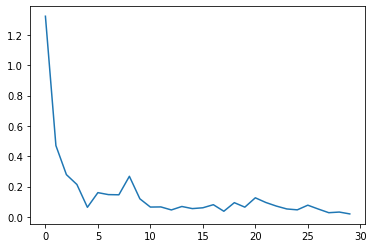

In [14]:
plt.plot(hist.history['loss'])

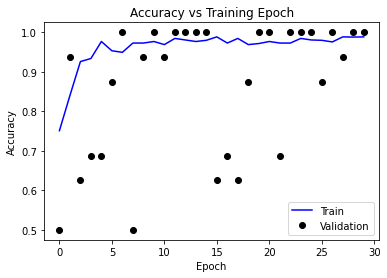

In [15]:
plt.plot(hist.history['accuracy'], 'b')
plt.plot(hist.history['val_accuracy'], 'ko')

plt.title('Accuracy vs Training Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation']);

In [16]:
#predict on the model
no_steps = len(test_batches)
p = model.predict(test_batches, steps=no_steps, verbose=True)
pre = pd.DataFrame(p)

35/35 [==============================] - 7s 210ms/step


In [17]:
#class prediction results
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("corona")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)

In [18]:
accuracy_score(pre["label"], pre["pre"])

0.8817204301075269

In [20]:
from sklearn.metrics import recall_score
recall_score(pre["label"], pre["pre"], average=None)

array([0.85897436, 1.        ])

In [22]:
from sklearn.metrics import f1_score
f1_score(pre["label"], pre["pre"], average=None)

array([0.92413793, 0.73170732])

In [21]:
pre.tail(60)

,0,1,filename,label,pre
219,9.916446e-01,0.008355,NORMAL/NORMAL2-IM-0362-0001.jpeg,0,0
220,9.994993e-01,0.000501,NORMAL/NORMAL2-IM-0364-0001.jpeg,0,0
221,9.730636e-01,0.026936,NORMAL/NORMAL2-IM-0366-0001.jpeg,0,0
222,9.766819e-01,0.023318,NORMAL/NORMAL2-IM-0368-0001.jpeg,0,0
223,9.994548e-01,0.000545,NORMAL/NORMAL2-IM-0369-0001.jpeg,0,0
224,9.917331e-01,0.008267,NORMAL/NORMAL2-IM-0370-0001.jpeg,0,0
225,9.870617e-01,0.012938,NORMAL/NORMAL2-IM-0372-0001.jpeg,0,0
226,9.997491e-01,0.000251,NORMAL/NORMAL2-IM-0373-0001.jpeg,0,0
227,9.876621e-01,0.012338,NORMAL/NORMAL2-IM-0374-0001-0001.jpeg,0,0
228,9.752075e-01,0.024792,NORMAL/NORMAL2-IM-0374-0001-0002.jpeg,0,0


In [23]:
pre.to_csv('CNresults.csv')